In [86]:
import datetime as dt
import matplotlib .pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpdates
import mplfinance as fplt

In [63]:
style.use('ggplot')
x = dt.datetime.now()
start=dt.datetime(2000,1,1)
end=dt.datetime(x.year,x.month,x.day)


In [64]:
df=web.DataReader('SBIN.NS','yahoo',start,end)
print(df.tail())
df.to_csv('sbi.csv')

                  High         Low        Open       Close      Volume  \
Date                                                                     
2021-05-06  359.350006  350.549988  358.000000  355.549988  36294427.0   
2021-05-07  362.000000  353.000000  357.500000  358.250000  38357618.0   
2021-05-10  367.000000  358.799988  360.500000  361.700012  41739324.0   
2021-05-11  366.399994  354.750000  356.850006  364.649994  41892770.0   
2021-05-12  373.500000  361.899994  362.799988  367.700012  53436590.0   

             Adj Close  
Date                    
2021-05-06  355.549988  
2021-05-07  358.250000  
2021-05-10  361.700012  
2021-05-11  364.649994  
2021-05-12  367.700012  


In [65]:
df=pd.read_csv('sbi.csv',parse_dates=True,index_col=0)
print(df.head())

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2000-01-03  22.988886  22.101974  22.267092  22.988886  25152894.0  16.833885
2000-01-04  24.720245  22.535995  22.988886  24.446625  47648560.0  17.901331
2000-01-05  24.974997  23.116261  23.493668  23.441774  36396207.0  17.165516
2000-01-06  25.286358  23.776726  23.776726  24.625893  70573968.0  18.032602
2000-01-07  26.409147  24.059780  24.673071  25.786425  83453217.0  18.882420


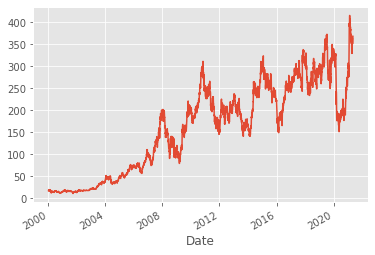

In [66]:
df['Adj Close'].plot()
plt.show()

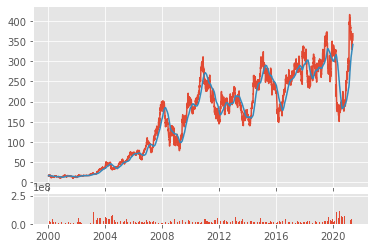

In [78]:
df['100ma'] = df['Adj Close'].rolling(window=100,min_periods=0).mean()
# df.dropna(inplace=True)
# print(df.head())

ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index,df['100ma'])
ax2.bar(df.index,df['Volume'])
plt.show()

In [91]:
df_ohlc=df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()
print(df_ohlc)

                  open        high         low       close
Date                                                      
2000-01-03   16.833885   18.882420   16.833885   16.909880
2000-01-13   16.892612   16.892612   16.298428   16.405519
2000-01-23   15.773346   17.168970   15.534981   17.030790
2000-02-02   17.099880   17.880602   16.740610   17.279516
2000-02-12   18.419508   18.419508   16.657700   16.871883
...                ...         ...         ...         ...
2021-04-02  353.549988  358.549988  350.549988  353.000000
2021-04-12  328.850006  342.700012  328.850006  329.500000
2021-04-22  336.649994  363.399994  336.450012  353.500000
2021-05-02  350.600006  364.649994  350.600006  364.649994
2021-05-12  367.700012  367.700012  367.700012  367.700012

[781 rows x 4 columns]


In [92]:
df_ohlc.reset_index(inplace=True)
print(df_ohlc.head())

        Date       open       high        low      close
0 2000-01-03  16.833885  18.882420  16.833885  16.909880
1 2000-01-13  16.892612  16.892612  16.298428  16.405519
2 2000-01-23  15.773346  17.168970  15.534981  17.030790
3 2000-02-02  17.099880  17.880602  16.740610  17.279516
4 2000-02-12  18.419508  18.419508  16.657700  16.871883


In [ ]:
df_ohlc['Date']=df_ohlc['Date'].map(mpdates.date2num)
print(df_ohlc.head())


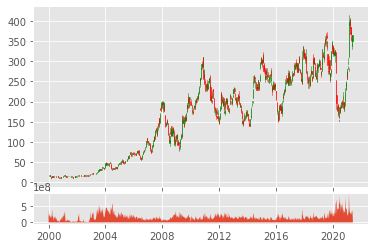

In [103]:

ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()
# ax=plt.subplots()
# fig=plt.subplots()
# ax.xaxis_date()
candlestick_ohlc(ax1,df_ohlc.values,width=2,colorup='green', colordown = 'red')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()